# Loan Approval Dataset

Finance companies deals with some kinds of home loans. They may have their presence across urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Mostly Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, I have provided a data set to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. Try to automate this Loan Eligibility Process.

1. Loan_ID- Unique Loan ID
2. Gender- Male/ Female
3. Married- Applicant married (Y/N)
4. Dependents- Number of dependents
5. Education- Applicant Education (Graduate/ Under Graduate)
6. Self_Employed- Self employed (Y/N)
7. ApplicantIncome- Applicant income
8. CoapplicantIncome- Coapplicant income
9. LoanAmount- Loan amount in thousands
10. Loan_Amount_Term- Term of loan in months
11. Credit_History- credit history meets guidelines
12. Property_Area- Urban/ Semi Urban/ Rural
13. Loan_Status- (Target) Loan approved (Y/N)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(4,1)
# Modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
df_train=pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science Project\Finance Loan approval\src\notebook\test.csv')
df_test=pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science Project\Finance Loan approval\src\notebook\train.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df=pd.concat([df_train,df_test])

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# Handle Categorical Missing Value

In [8]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

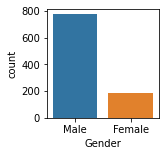

In [10]:
plt.figure(figsize=(2,2))
sns.countplot(x='Gender',data=df)

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

<Axes: xlabel='Dependents', ylabel='count'>

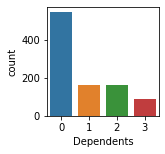

In [13]:
plt.figure(figsize=(2,2))
sns.countplot(x='Dependents',data=df)

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: xlabel='Self_Employed', ylabel='count'>

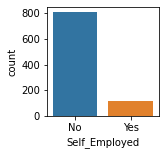

In [15]:
plt.figure(figsize=(2,2))
sns.countplot(x='Self_Employed',data=df)

In [16]:
columns_to_replace = ['Gender', 'Dependents', 'Self_Employed','Married','Loan_Status']        #Loan status has bee added         
df[columns_to_replace] = df[columns_to_replace].fillna(df.mode().iloc[0])

In [17]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

<Axes: xlabel='Property_Area', ylabel='count'>

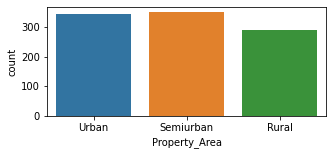

In [19]:
plt.figure(figsize=(5,2))
sns.countplot(x='Property_Area',data=df)

# Handle Numerical Missing Value

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


(array([544., 322.,  63.,  24.,  14.,   3.,   1.,   2.,   1.,   3.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([    0.,  4050.,  8100., 12150., 16200., 20250., 24300., 28350.,
        32400., 36450., 40500., 44550., 48600., 52650., 56700., 60750.,
        64800., 68850., 72900., 76950., 81000.]),
 <BarContainer object of 20 artists>)

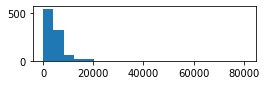

In [20]:
plt.hist(df['ApplicantIncome'],bins=20)

(array([ 19.,  92., 234., 281., 150.,  88.,  20.,  25.,  15.,   6.,   5.,
          4.,   1.,   5.,   3.,   1.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <BarContainer object of 20 artists>)

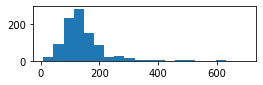

In [21]:
plt.hist(df['LoanAmount'],bins=20)

In [22]:
num_columns_to_replace = ['LoanAmount', 'Loan_Amount_Term','Credit_History']                 
df[num_columns_to_replace] = df[num_columns_to_replace].fillna(df.median().iloc[0])

TypeError: could not convert string to float: 'LP001015'

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encode Categorical Features

In [ ]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Married']=df['Married'].map({'No':0,'Yes':1})
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':1, 'Urban':2})

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,1,0,2340,2546.0,100.0,360.0,0.0,2,1
4,LP001051,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,2,1


In [ ]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32364\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.327012,-0.040649,0.024719,0.060444,0.082428,0.087561,-0.063592,0.030381,-0.020801,0.009116
Married,0.327012,1.000000,-0.026211,0.013666,0.052126,0.061606,0.140185,-0.048255,0.018733,0.006372,0.059570
Education,-0.040649,-0.026211,1.000000,0.010848,0.138909,0.060380,0.163894,0.056236,0.055557,0.050685,0.057680
Self_Employed,0.024719,0.013666,0.010848,1.000000,0.113106,-0.018861,0.103809,-0.019222,0.033584,-0.059678,-0.021323
ApplicantIncome,0.060444,0.052126,0.138909,0.113106,1.000000,-0.114247,0.518314,-0.006297,0.029453,0.005513,-0.023077
CoapplicantIncome,0.082428,0.061606,0.060380,-0.018861,-0.114247,1.000000,0.178831,-0.049129,-0.068562,-0.024921,-0.050084
LoanAmount,0.087561,0.140185,0.163894,0.103809,0.518314,0.178831,1.000000,0.058462,-0.023243,-0.044483,-0.024532
Loan_Amount_Term,-0.063592,-0.048255,0.056236,-0.019222,-0.006297,-0.049129,0.058462,1.000000,0.019032,-0.049651,0.011716
Credit_History,0.030381,0.018733,0.055557,0.033584,0.029453,-0.068562,-0.023243,0.019032,1.000000,0.009153,0.308099
Property_Area,-0.020801,0.006372,0.050685,-0.059678,0.005513,-0.024921,-0.044483,-0.049651,0.009153,1.000000,0.032649


C:\Users\Administrator\AppData\Local\Temp\ipykernel_32364\787111090.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


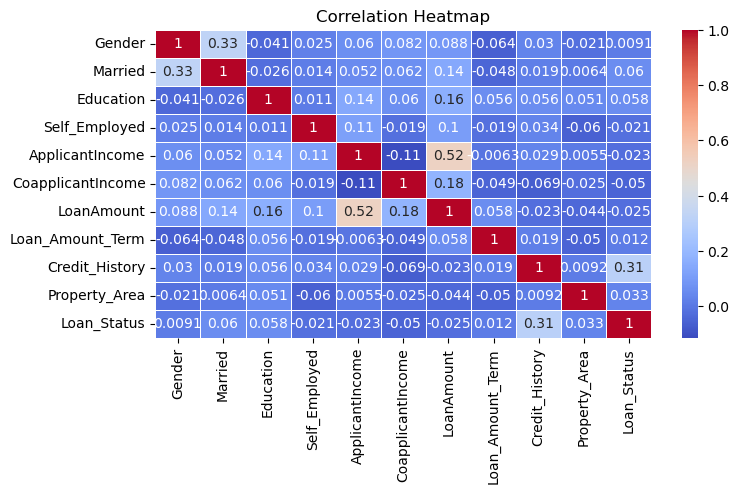

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df=df.drop(columns=['Loan_ID','Dependents','Gender'])

In [ ]:
df.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,5720,0.0,110.0,360.0,1.0,2,1
1,1,1,0,3076,1500.0,126.0,360.0,1.0,2,1
2,1,1,0,5000,1800.0,208.0,360.0,1.0,2,1
3,1,1,0,2340,2546.0,100.0,360.0,0.0,2,1
4,0,0,0,3276,0.0,78.0,360.0,1.0,2,1


In [ ]:
X=df.drop(columns=['Loan_Status'])

In [ ]:
y=df['Loan_Status']

In [ ]:
X.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,0,2340,2546.0,100.0,360.0,0.0,2
4,0,0,0,3276,0.0,78.0,360.0,1.0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Data Modelling

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
#pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf',C=10))])
#pipe.fit(X_train,y_train)
#pipe.score(X_test, y_test)

TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  27  28  29  30  31  32  33  36  37  38  41  42
  43  44  45  46  47  48  50  51  52  53  55  56  60  62  64  65  67  68
  70  71  72  73  74  76  77  78  79  81  83  84  85  86  87  88  89  90
  91  92  94  95  96  99 100 101 102 104 105 106 107 108 109 110 111 112
 115 116 117 118 120 122 123 125 126 131 132 133 134 135 136 137 138 139
 141 142 146 147 149 150 152 154 156 157 158 159 160 161 162 164 166 167
 168 170 171 172 173 177 178 179 180 181 182 183 184 186 187 188 189 190
 191 193 194 195 200 202 203 205 207 208 209 211 212 213 214 216 217 219
 222 223 224 227 229 230 232 233 234 235 236 238 239 240 241 242 243 244
 246 248 249 251 252 253 254 255 256 257 259 260 262 263 264 265 266 268
 270 271 272 273 274 275 277 278 279 281 282 283 286 287 288 290 291 292
 293 295 297 298 300 301 302 304 305 306 307 310 311 312 313 314 315 316
 318 319 320 327 328 329 331 332 333 334 335

def get_score (model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test)

print(classification_report(y_test, best_clf.predict(X_test)))

In [ ]:
model_params = {
    'svm': {'model': svm.SVC(gamma='auto', probability=True),'params': {'svc__C': [1, 10, 100, 1000],
                                                                        'svc__kernel': ['rbf', 'linear']}},
    'random_forest': {'model': RandomForestClassifier(),'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}},
    'logistic_regression': {'model': LogisticRegression(solver='liblinear', multi_class='auto'),'params': {
        'logisticregression__C': [1, 5, 10]}}
                }



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
best_estimator = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = RandomizedSearchCV(pipe, mp['params'], cv=5, n_iter=2, return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimator[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df
    

,model,best_score,best_params
0,svm,0.808672,"{'svc__kernel': 'linear', 'svc__C': 1000}"
1,random_forest,0.738560,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.801021,{'logisticregression__C': 10}


In [ ]:
best_estimator

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1000, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [ ]:
best_estimator['random_forest'].score(X_test,y_test)

0.751269035532995

In [ ]:
best_estimator['svm'].score(X_test,y_test)

0.7868020304568528

In [ ]:
best_estimator['logistic_regression'].score(X_test,y_test)

0.7817258883248731

In [ ]:
best_clf=best_estimator['svm']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.79      1.00      0.88       155

    accuracy                           0.79       197
   macro avg       0.39      0.50      0.44       197
weighted avg       0.62      0.79      0.69       197



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[  0,  42],
       [  0, 155]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

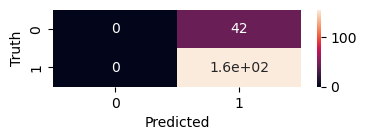

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

1. The best estimator is svm. The accuracy is a measure of how many predictions were correct out of the total number of            predictions which is 81% with train data and 79% with test data is quite good score.
2. Precision: Precision measures the accuracy of positive predictions. In this case, the precision for the positive class ("Y")    is approximately 79%. This means that out of all instances predicted as "Y," around 79% were correct.
3. Recall: Recall (also known as sensitivity or true positive rate) measures the ability of the model to correctly identify        positive instances. The recall for the positive class ("Y") is 100%, indicating that the model is capturing all positive        instances.
4. F1-score: The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall.    The F1-score for the positive class ("Y") is approximately 88%, which is a good balance between precision and recall.
5. Support: Support is the number of actual occurrences of each class in the dataset.
   The "macro avg" treats all classes equally, while the "weighted avg" takes into account the class imbalance in the dataset.    In your case, the weighted average is higher because the "Y" class dominates the dataset.
6. Confusion Matrix: True Negatives (TN): 0 - The number of instances that are actually negative and were correctly predicted      as negative.
   False Positives (FP): 42 - The number of instances that are actually negative but were incorrectly predicted as                positive.
   False Negatives (FN): 0 - The number of instances that are actually positive but were incorrectly predicted as                  negative.
   True Positives (TP): 162 - The number of instances that are actually positive and were correctly predicted as positive

In [ ]:
import pickle

with open('Home Loan Approval.pickle','wb') as f:
    pickle.dump(best_clf,f)
    

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))